In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [66]:
data = pd.read_csv("psychology_06_23.csv")
data['Decision Date'] = pd.to_datetime(data['Decision Date'], errors='coerce')
data['Date Added'] = pd.to_datetime(data['Date Added'], errors='coerce')
data['Decision Date'] = data['Decision Date'].fillna(data['Date Added'])

In [48]:
def get_interpolated_data(data, method):
    min_date = pd.to_datetime(data['ds'].min())
    max_date = pd.to_datetime(data['ds'].max())
    date_range = pd.date_range(min_date, max_date, freq='D')
    date_range_df = pd.DataFrame(date_range, columns=['ds'])
    interpolated_df = pd.merge(date_range_df, data, on='ds', how='left')
    for col in data.columns:
        if col != 'ds':
            interpolated_df[col] = interpolated_df[col].interpolate(method=method)
    return interpolated_df

In [49]:
def make_prediction(train_data, periods):
    model = Prophet()
    model.fit(train_data)
    future_dates = model.make_future_dataframe(periods=periods, freq='D', include_history=False)
    return model.predict(future_dates)


In [50]:
def evaluate_prediction(prediction, true_data, config):
    prediction = prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    comparison = pd.merge(true_data, prediction, on='ds', how='inner')


    mae = mean_absolute_error(comparison['y_true'], comparison['yhat'])
    mse = mean_squared_error(comparison['y_true'], comparison['yhat'])

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(comparison['ds'], comparison['y_true'], label='Actual', marker='o')
    plt.plot(comparison['ds'], comparison['yhat'], label='Predicted', marker='x')
    plt.fill_between(comparison['ds'], comparison['yhat_lower'], comparison['yhat_upper'], color='k', alpha=0.1)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Number of Decisions')
    plt.title("Decision type: {}, Interpolate method: {}, Mean days: {}".format(*config))
    plt.savefig("figures/{}_{}_{}.png".format(*config))

In [75]:
def predict_and_evaluate_post_per_day(data, interpolate_method = None, mean_days = None):
    decisions = ['All', 'Interview', 'Accepted', 'Rejected']
    for decision in decisions:
        print("Predict and evaluate {} post per day".format(decision))
        
        # Get post per day and split data to train and test dataset
        if decision == 'All':
            post_per_day = data.groupby(['Decision Date']).size().reset_index(name='Count')
        else:
            post_per_day = data[data['Decision'] == decision].groupby(['Decision Date']).size().reset_index(name='Count')

        post_per_day['Decision Year'] = post_per_day['Decision Date'].dt.year
        train = post_per_day[post_per_day['Decision Year'] < 2021].drop('Decision Year', axis=1)
        train.columns = ['ds', 'y']
        test = post_per_day[post_per_day['Decision Year'] >= 2021].drop('Decision Year', axis=1)
        test.columns = ['ds', 'y_true']

        # (Optional) Process data before fitting model
        if interpolate_method:
            train = get_interpolated_data(train, interpolate_method)
        if mean_days:
            train["y"] = train["y"].rolling(window = mean_days).mean().fillna(train["y"])
            
        # Fit model and make prediction
        pred = make_prediction(train, 861)            
        evaluate_prediction(pred, test, (decision, interpolate_method, mean_days))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 19.33
Mean Squared Error (MSE): 654.02


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 8.11
Mean Squared Error (MSE): 141.54


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.01
Mean Squared Error (MSE): 46.63


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 6.85
Mean Squared Error (MSE): 99.32


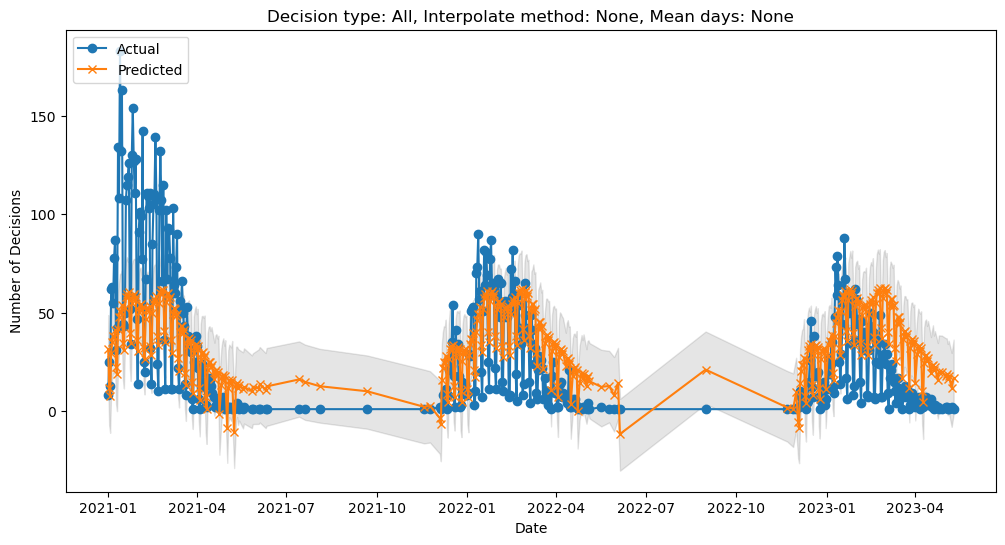

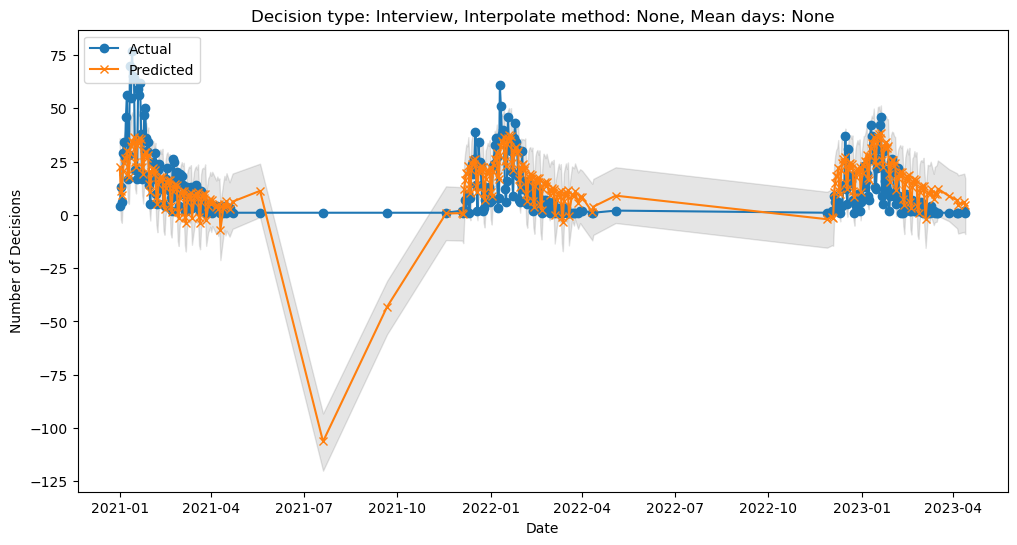

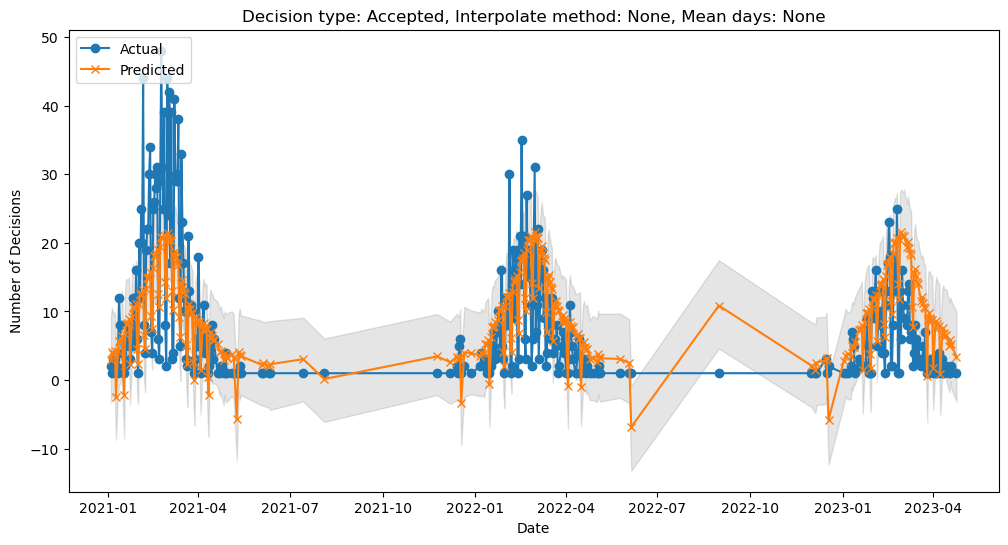

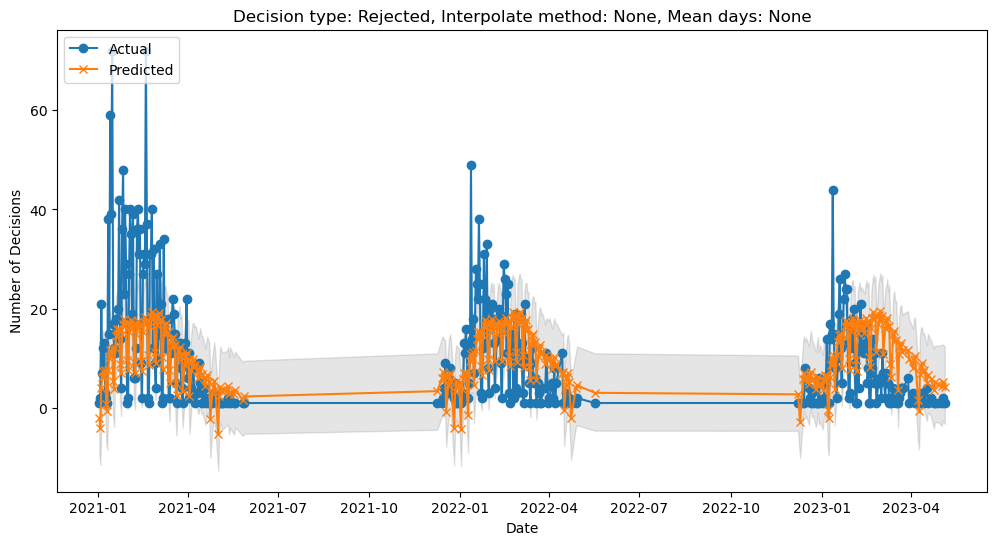

In [76]:
predict_and_evaluate_post_per_day(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 18.46
Mean Squared Error (MSE): 777.46


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.19
Mean Squared Error (MSE): 124.39


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 4.89
Mean Squared Error (MSE): 57.38


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 6.91
Mean Squared Error (MSE): 115.43


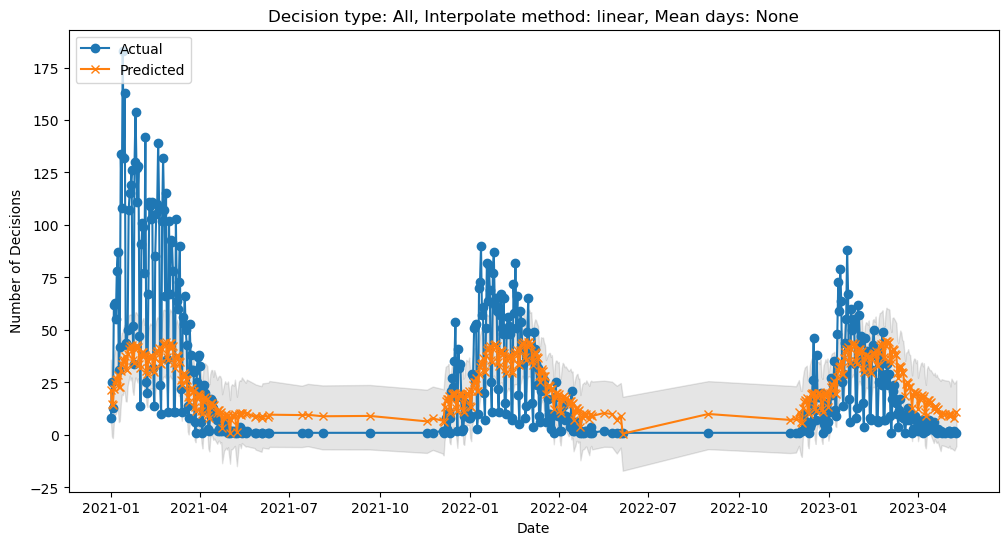

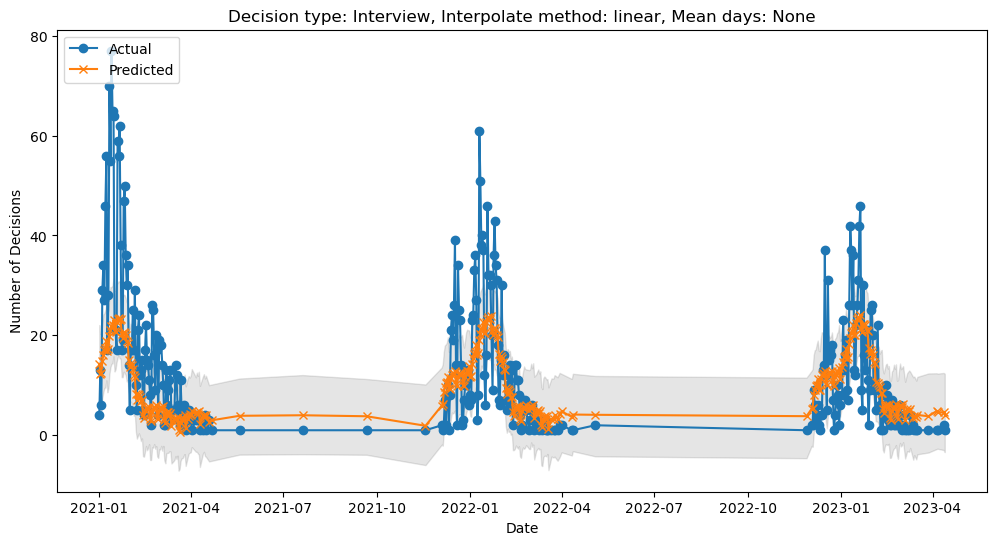

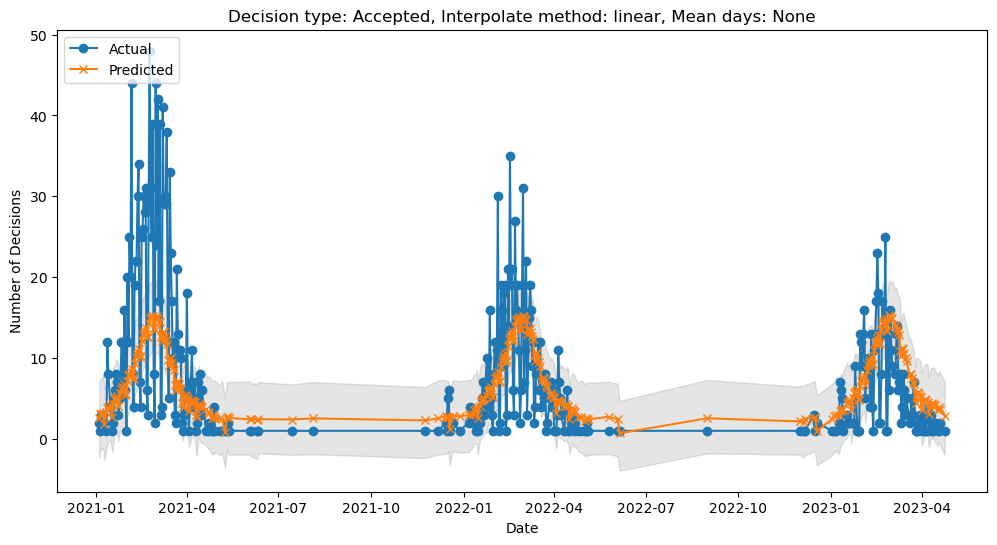

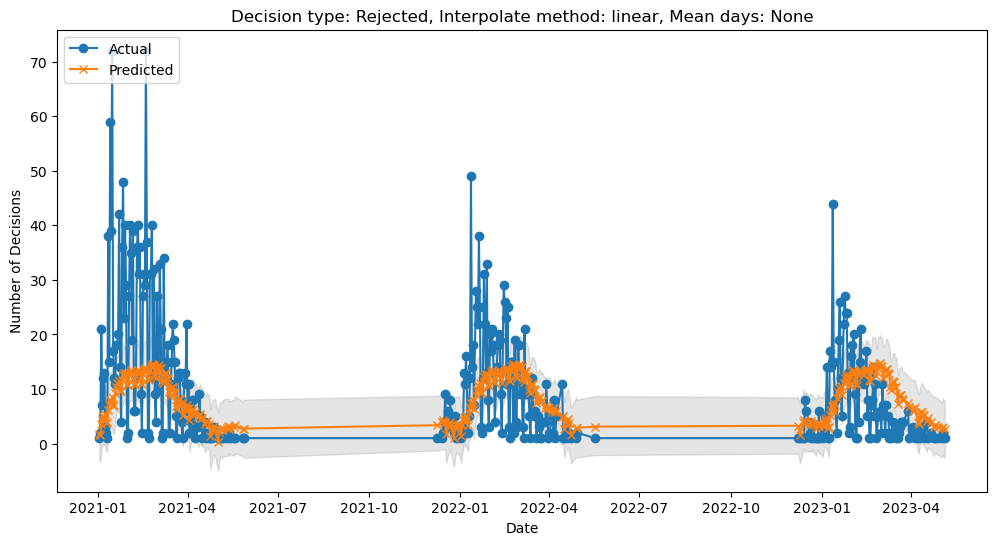

In [77]:
predict_and_evaluate_post_per_day(data, interpolate_method = "linear")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 18.47
Mean Squared Error (MSE): 777.83


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.17
Mean Squared Error (MSE): 125.09


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 4.91
Mean Squared Error (MSE): 57.35


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 6.90
Mean Squared Error (MSE): 115.04


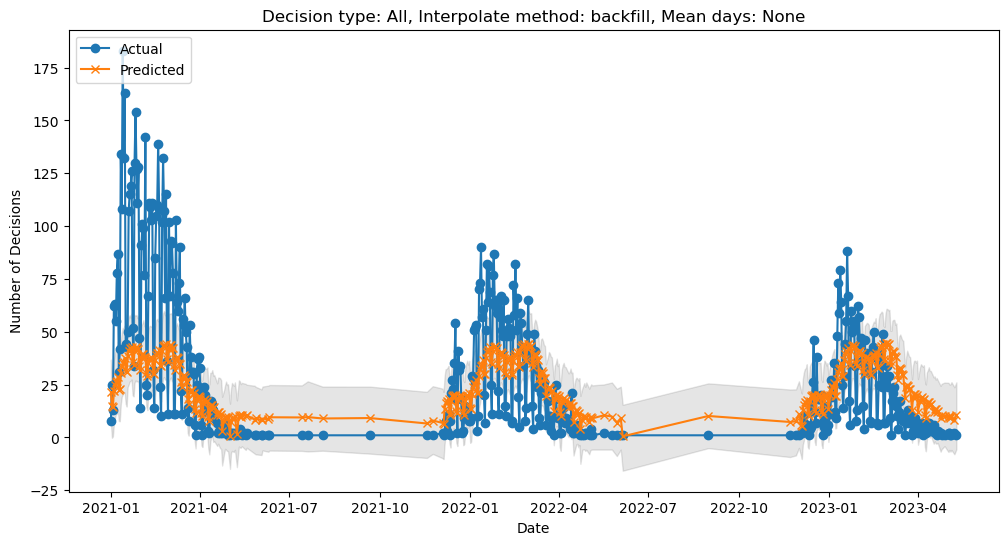

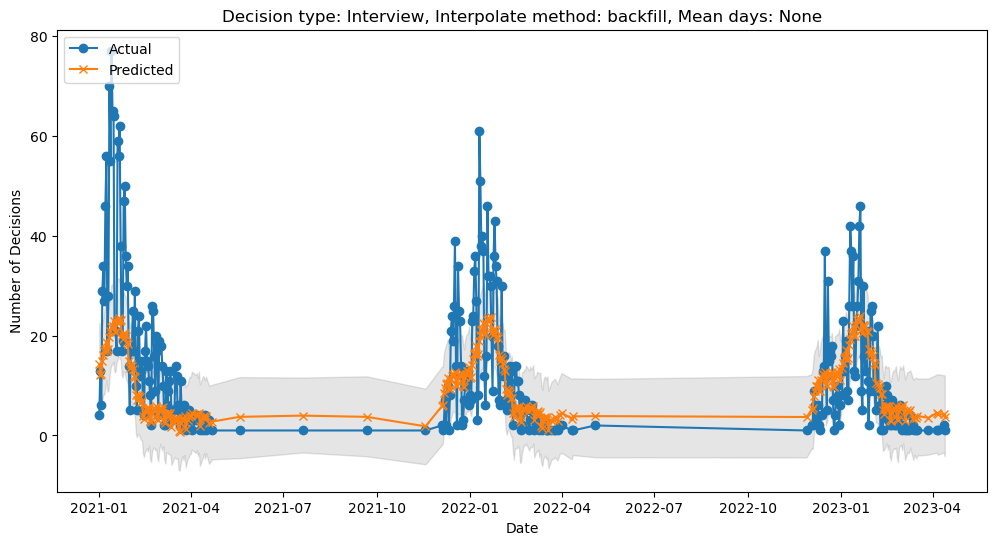

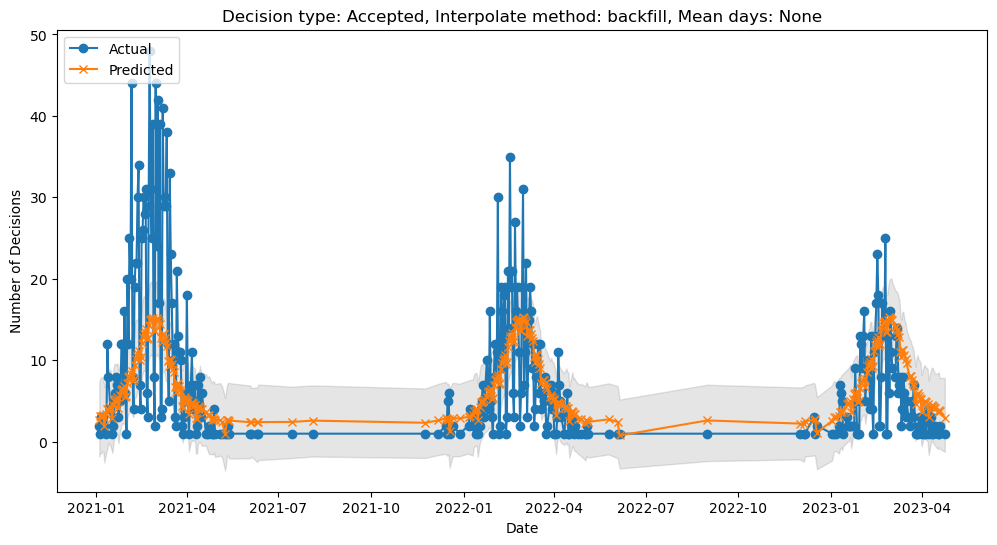

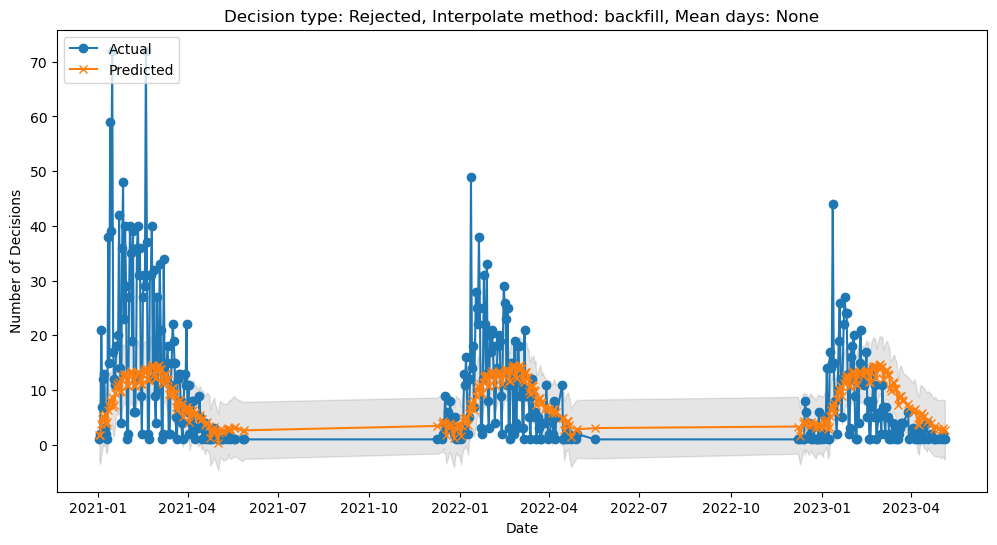

In [78]:
predict_and_evaluate_post_per_day(data, interpolate_method = "backfill")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 18.61
Mean Squared Error (MSE): 772.53


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.64
Mean Squared Error (MSE): 147.88


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 4.92
Mean Squared Error (MSE): 57.18


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 9.10
Mean Squared Error (MSE): 179.08


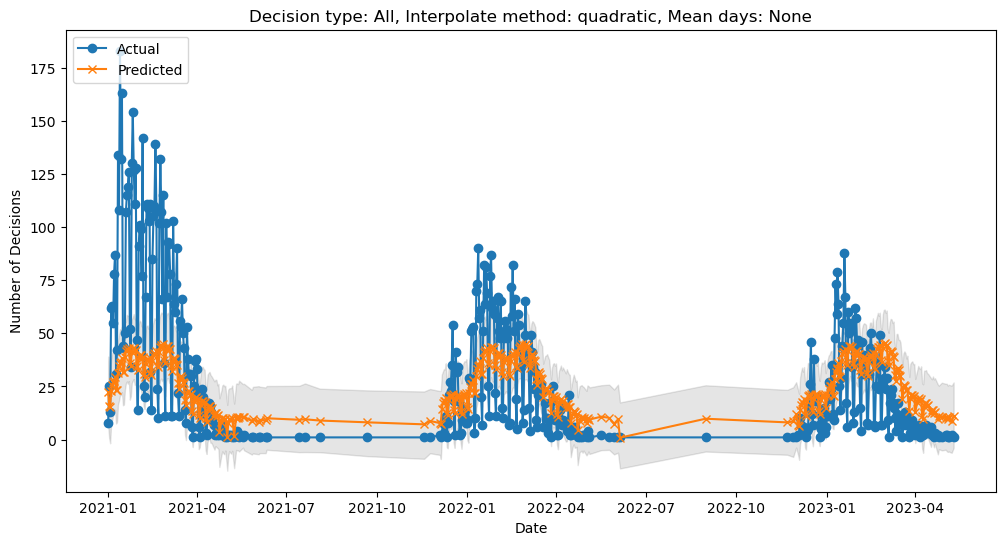

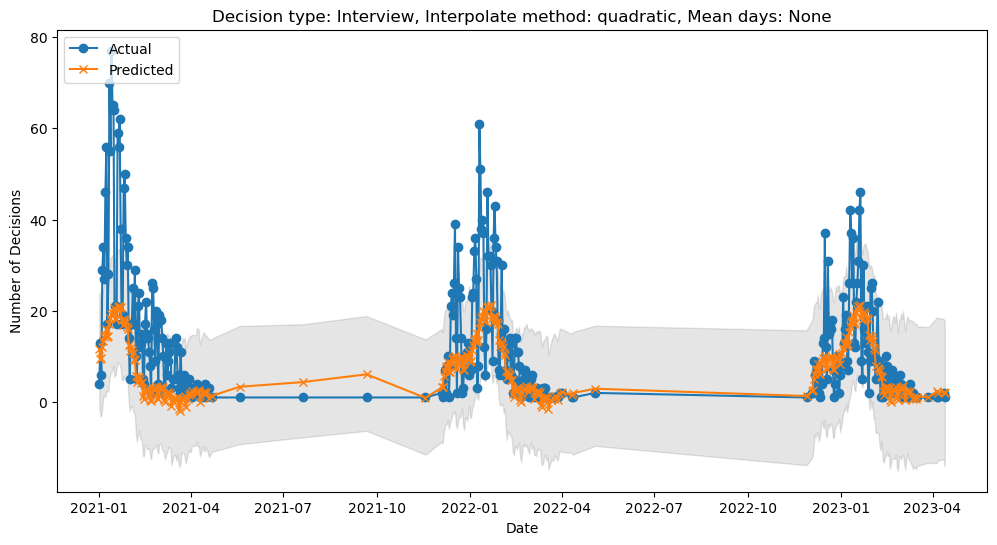

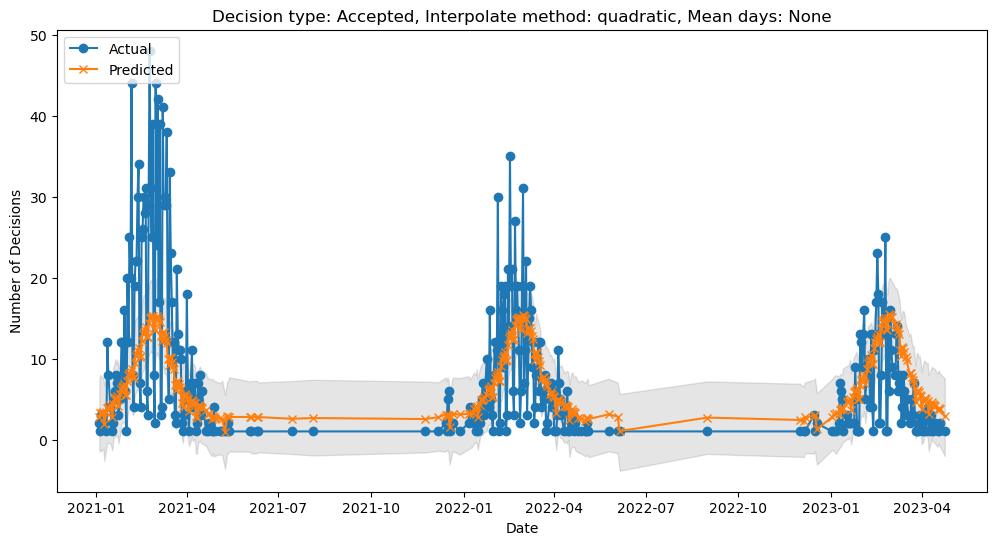

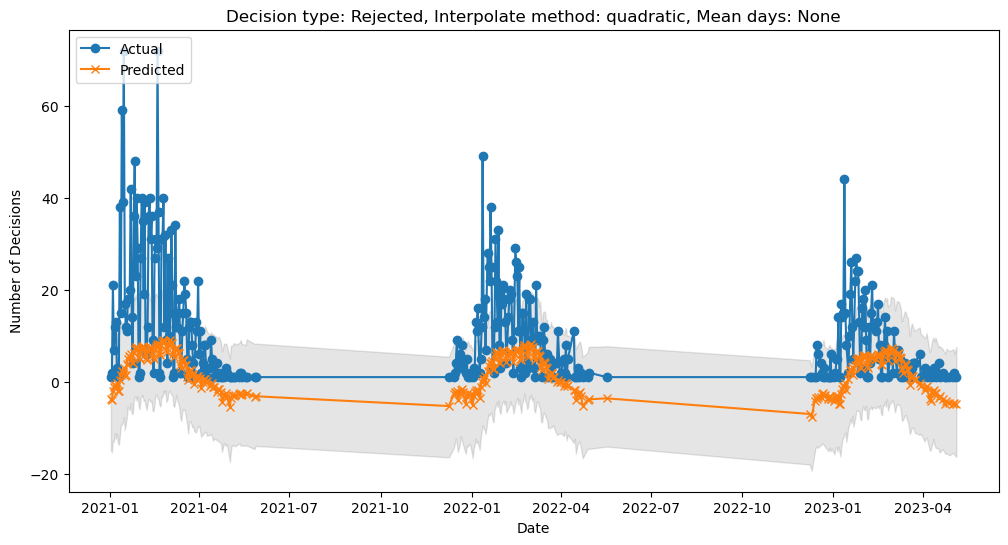

In [79]:
predict_and_evaluate_post_per_day(data, interpolate_method = "quadratic")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 19.75
Mean Squared Error (MSE): 874.05


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.57
Mean Squared Error (MSE): 136.55
Predict and evaluate Accepted post per day


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.17
Mean Squared Error (MSE): 62.64


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.37
Mean Squared Error (MSE): 126.03


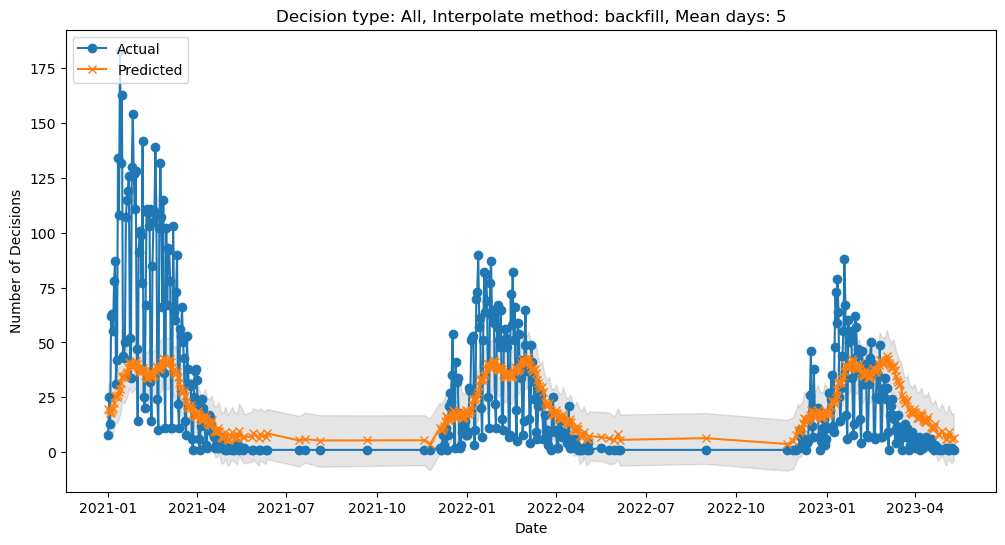

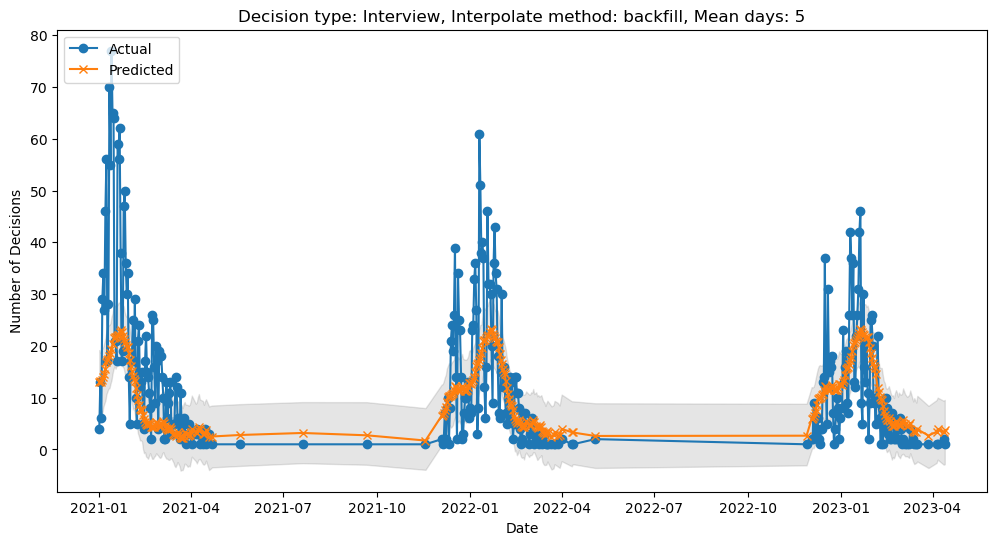

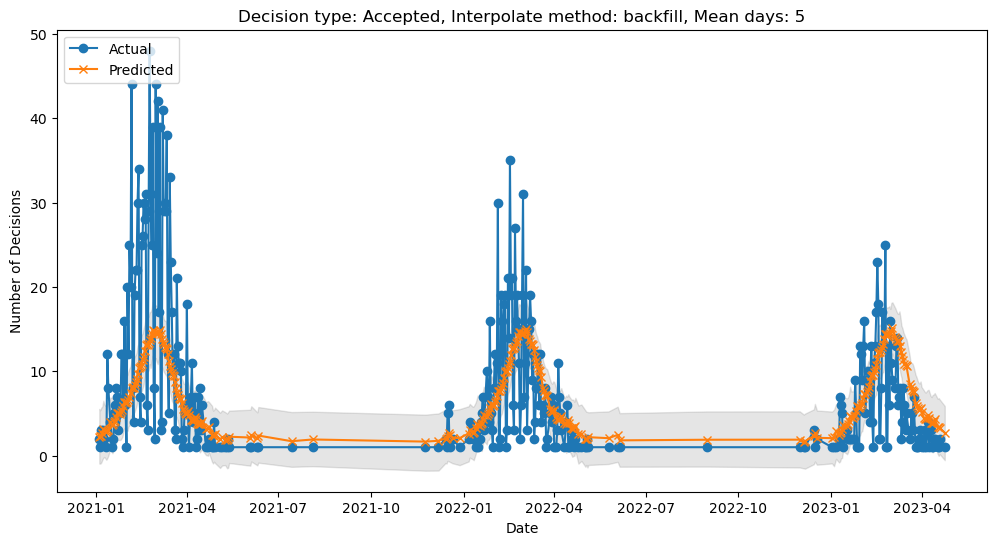

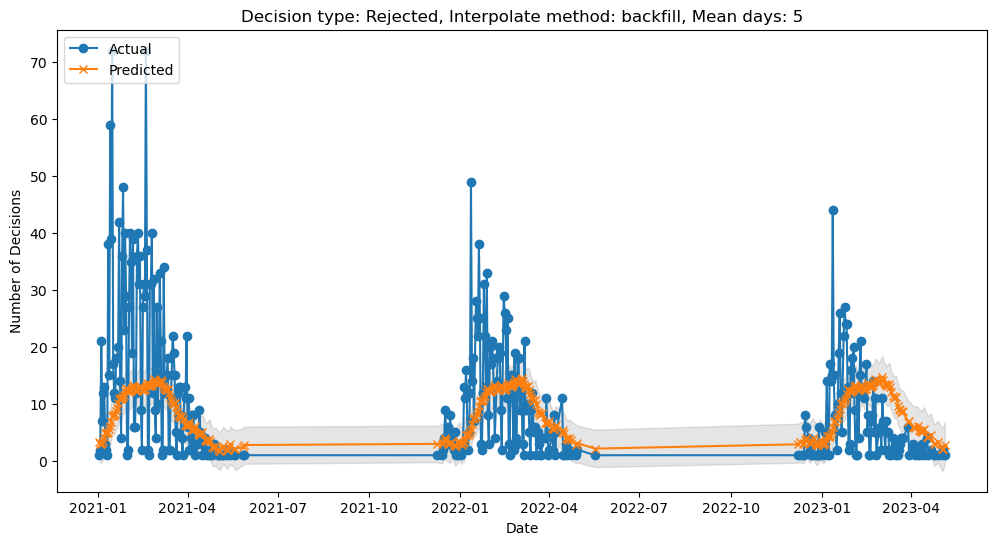

In [80]:
predict_and_evaluate_post_per_day(data, interpolate_method = "backfill", mean_days = 5)

Predict and evaluate All post per day


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 19.39
Mean Squared Error (MSE): 841.25


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.46
Mean Squared Error (MSE): 133.07


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.06
Mean Squared Error (MSE): 60.80


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 7.21
Mean Squared Error (MSE): 121.47


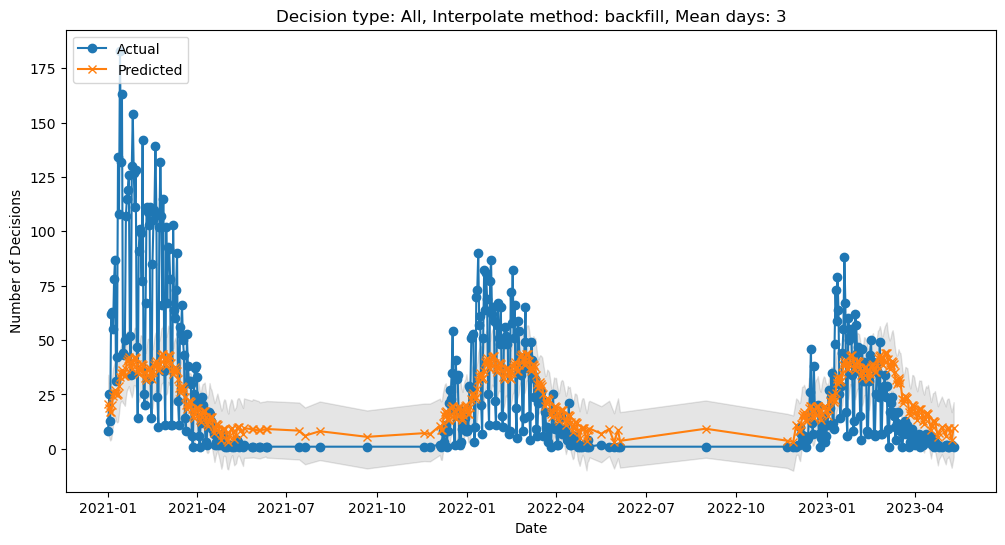

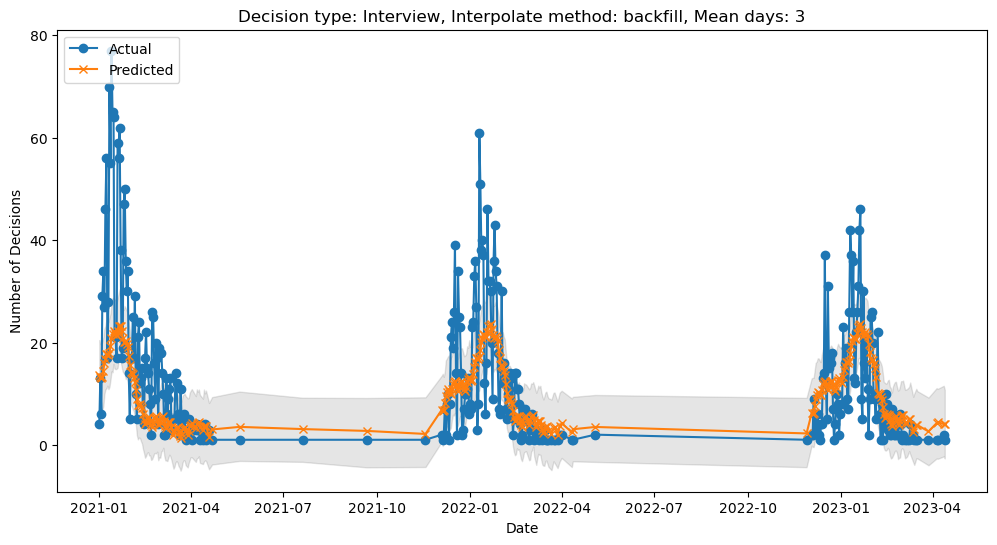

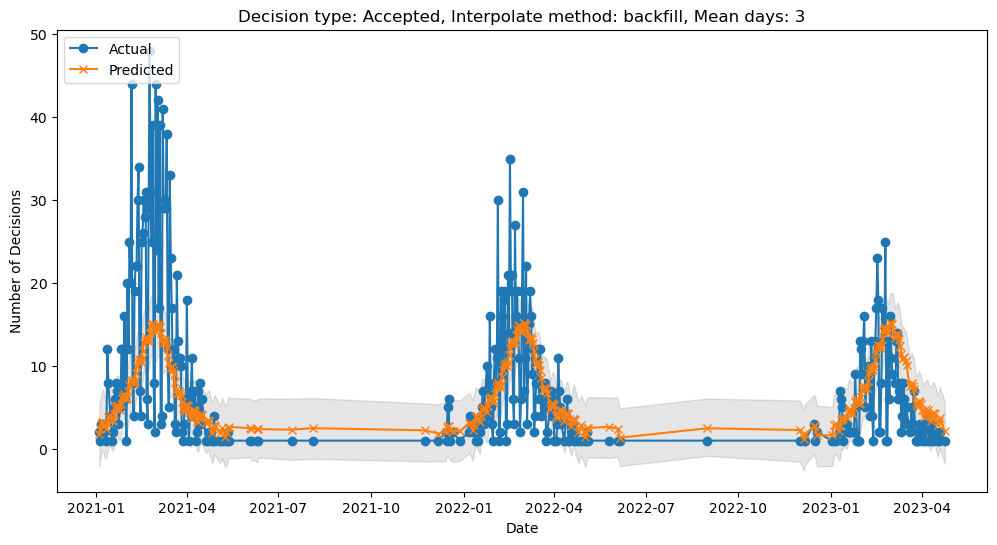

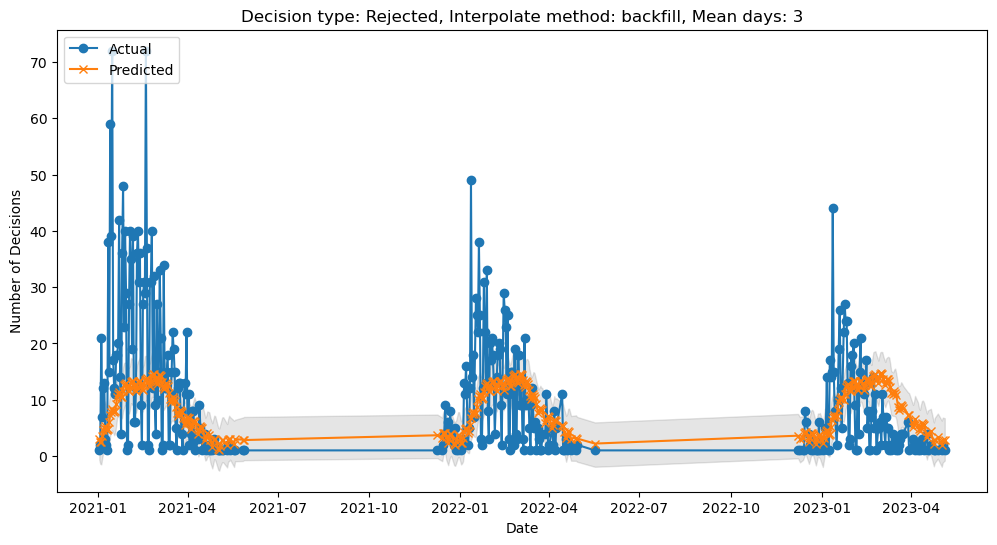

In [81]:
predict_and_evaluate_post_per_day(data, interpolate_method = "backfill", mean_days = 3)